In [50]:
# import all the libraries
import numpy as np
import pandas as pd
import seaborn as sb        
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import sklearn  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score 


Part1: Load the dataset in the file named BDOShoham.csv and produce at least one table and one graph that summarize the dataset statistics;

In [51]:
dataset = pd.read_csv('BDOShoham.csv')    #loading the given data

In [52]:
display(dataset)

,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
0,1,6.30000,0.0250,0.001,0.00002,1000,1.8,0.07,0.0,0.051
1,1,4.00000,0.0400,0.001,0.00002,1000,1.8,0.07,0.0,0.051
2,1,6.30000,0.0400,0.001,0.00002,1000,1.8,0.07,0.0,0.051
3,1,4.00000,0.0630,0.001,0.00002,1000,1.8,0.07,0.0,0.051
4,1,6.30000,0.0630,0.001,0.00002,1000,1.8,0.07,0.0,0.051
...,...,...,...,...,...,...,...,...,...,...
5670,5,2.70096,15.8561,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5671,5,1.58784,15.8394,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5672,5,1.05338,16.0692,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5673,5,1.05397,25.7439,0.001,0.00002,1000,1.8,0.07,-80.0,0.025


In [53]:
dataset = dataset.dropna()

In [54]:
display(dataset)

,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
0,1,6.30000,0.0250,0.001,0.00002,1000,1.8,0.07,0.0,0.051
1,1,4.00000,0.0400,0.001,0.00002,1000,1.8,0.07,0.0,0.051
2,1,6.30000,0.0400,0.001,0.00002,1000,1.8,0.07,0.0,0.051
3,1,4.00000,0.0630,0.001,0.00002,1000,1.8,0.07,0.0,0.051
4,1,6.30000,0.0630,0.001,0.00002,1000,1.8,0.07,0.0,0.051
...,...,...,...,...,...,...,...,...,...,...
5670,5,2.70096,15.8561,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5671,5,1.58784,15.8394,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5672,5,1.05338,16.0692,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5673,5,1.05397,25.7439,0.001,0.00002,1000,1.8,0.07,-80.0,0.025


In [55]:
dataset.head()

,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
0,1,6.3,0.025,0.001,0.00002,1000,1.8,0.07,0.0,0.051
1,1,4.0,0.040,0.001,0.00002,1000,1.8,0.07,0.0,0.051
2,1,6.3,0.040,0.001,0.00002,1000,1.8,0.07,0.0,0.051
3,1,4.0,0.063,0.001,0.00002,1000,1.8,0.07,0.0,0.051
4,1,6.3,0.063,0.001,0.00002,1000,1.8,0.07,0.0,0.051


In [56]:
dataset.tail()

,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
5670,5,2.70096,15.8561,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5671,5,1.58784,15.8394,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5672,5,1.05338,16.0692,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5673,5,1.05397,25.7439,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5674,5,1.66789,26.1616,0.001,0.00002,1000,1.8,0.07,-80.0,0.025


In [57]:
display(dataset.describe(include='all'))  #describing the statistics

,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
count,5675.000000,5675.000000,5675.000000,5.675000e+03,5.675000e+03,5675.0,5.675000e+03,5.675000e+03,5675.000000,5675.000000
mean,4.059912,0.899747,6.222612,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,2.727401,0.038657
std,1.379238,1.425159,8.699644,2.168595e-19,3.388430e-21,0.0,6.661925e-16,1.387901e-17,46.202822,0.012985
min,1.000000,0.001100,0.003720,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-90.000000,0.025000
25%,3.000000,0.016000,0.162055,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-10.000000,0.025000
50%,5.000000,0.250000,1.600000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,0.500000,0.051000
75%,5.000000,1.500000,10.000000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,20.000000,0.051000
max,7.000000,25.517000,42.956200,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,90.000000,0.051000


Set up a classification problem: predicting the FlowPattern value based on the values of the variables named Vsl, Vsg, and Ang. Train at least two models (e.g., k-NN, logistic regression) to solve this classification problem; (4 points)

In [58]:
X_Variable = [ 'Vsl', 'Vsg', 'Ang' ] # columns to focus on as predictors
X = dataset[X_Variable]   
y_target = 'FlowPattern'     # column to focus on as target
y = dataset[y_target]   #selecting the Flowpattern colum values
print('done \n')

done 



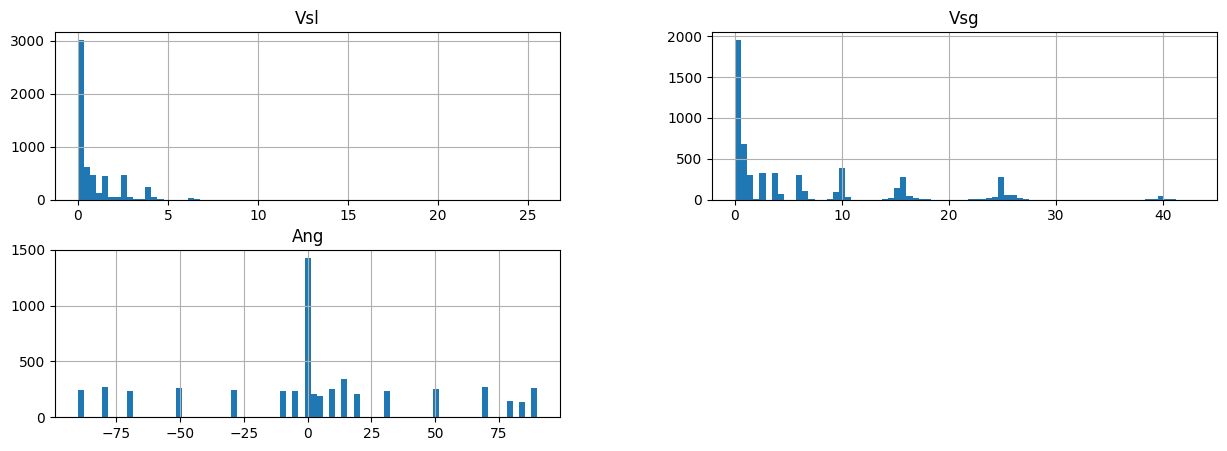

In [59]:
X.hist(figsize=(15, 5), bins=75)  # bins ~= sqrt(N)
plt.show()

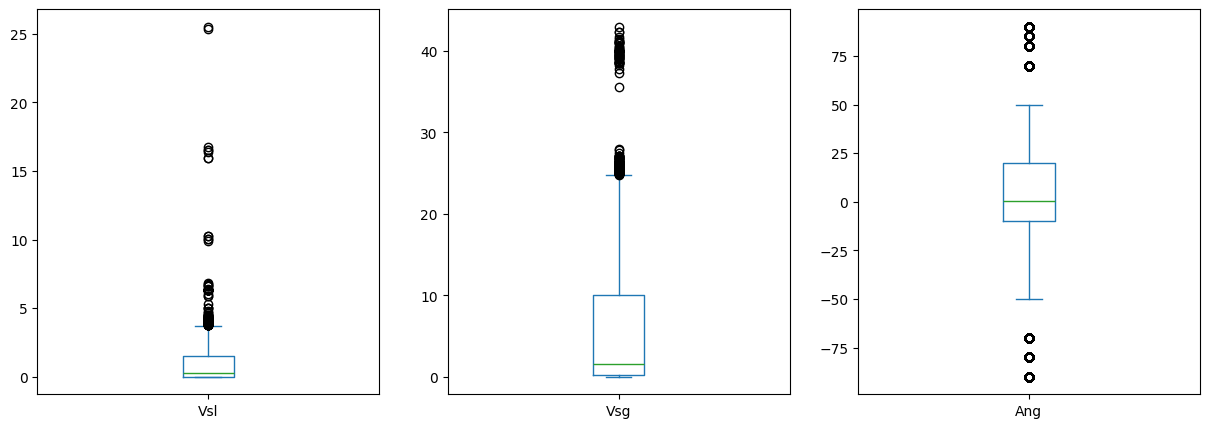

In [60]:
X.plot(figsize=(15, 5), kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

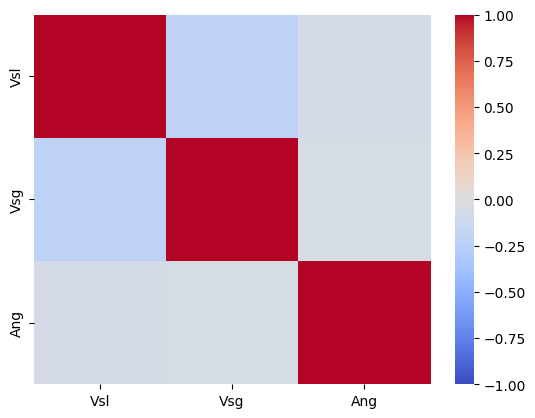

In [61]:
corr = X.corr()
sb.heatmap( corr, cmap='coolwarm', vmax=1.0, vmin=-1.0 );
plt.show()

Model 1 : Logistic Regression

In [62]:
test_pct = 0.2   # reserve 20% of the data points for testing performance
seed = 7          # specifying the seed allows for repeatability
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)
print('done with setting aside data for testing')

done with setting aside data for testing


In [63]:
display(X_test)

,Vsl,Vsg,Ang
56,0.10000,1.00000,0.0
4351,2.50000,0.16000,-1.0
325,0.01600,6.30000,0.5
1483,0.44608,24.50310,20.0
4009,1.50000,0.15000,10.0
...,...,...,...
1365,0.70297,6.29042,15.0
3582,0.16000,4.00000,1.0
3847,2.75928,0.60430,15.0
1096,0.02500,16.00000,-5.0


In [64]:
LogisticReg = LogisticRegression(solver='liblinear')
LogisticReg.fit(X_train, y_train)  # train the model on the training data
print('done with training the Logistic regression model')

done with training the Logistic regression model


In [65]:
log_reg_predicted = LogisticReg.predict(X_test)  #make predictions using the validation data 
print('Accuracy of regression model is:', accuracy_score(y_test, log_reg_predicted))

Accuracy of regression model is: 0.6581497797356828


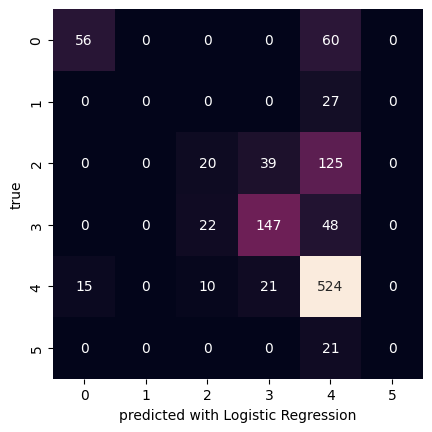


 clasification report:
               precision    recall  f1-score   support

           1       0.79      0.48      0.60       116
           2       0.00      0.00      0.00        27
           3       0.38      0.11      0.17       184
           4       0.71      0.68      0.69       217
           5       0.65      0.92      0.76       570
           7       0.00      0.00      0.00        21

    accuracy                           0.66      1135
   macro avg       0.42      0.36      0.37      1135
weighted avg       0.61      0.66      0.60      1135

Cohen Kappa Score: 0.4255803154495129


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [66]:
sb.heatmap(confusion_matrix(y_test, log_reg_predicted), square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted with Logistic Regression')
plt.ylabel('true')
plt.show()
print('\n clasification report:\n', classification_report(y_test, log_reg_predicted))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, log_reg_predicted))

 0.434361 1.322329 4.000000


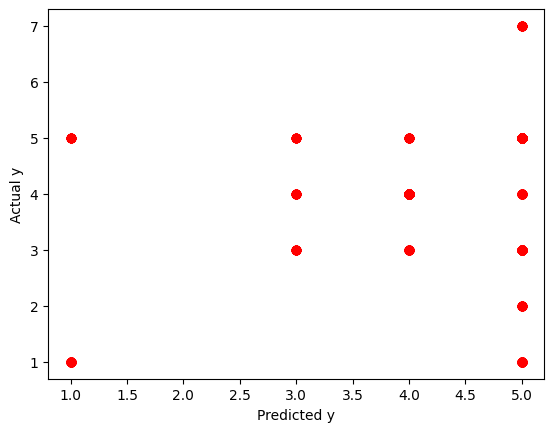

In [67]:
error_logreg = log_reg_predicted - y_test
msg = " %f %f %f" % (error_logreg.mean(), error_logreg.std(), error_logreg.max())
print(msg)
y_actual = np.asarray(y_test)
plt.plot(log_reg_predicted, y_actual,'ro')
#plt.plot([LL,UR],[LL,UR], 'g-')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
plt.show()

Model 2 - K Nearest Neighbors 

In [68]:
X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)

In [69]:
kregressor = KNeighborsClassifier(n_neighbors=2, weights='distance')
kregressor.fit(X_train2, y_train2)  # train the model on the training data
print('done with training the regression model')
k_reg_predicted = kregressor.predict(X_test2)
print('Accuracy of k Neighbors regression model is:', accuracy_score(y_test2, k_reg_predicted))


done with training the regression model
Accuracy of k Neighbors regression model is: 0.8555066079295154


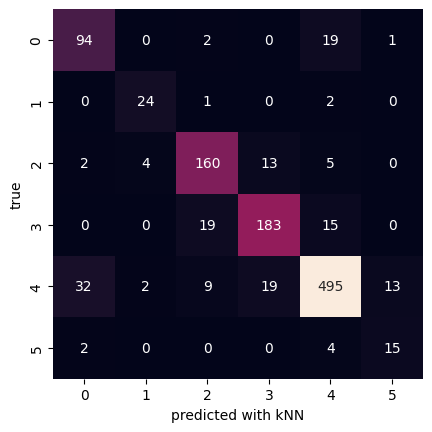


 clasification report:
               precision    recall  f1-score   support

           1       0.72      0.81      0.76       116
           2       0.80      0.89      0.84        27
           3       0.84      0.87      0.85       184
           4       0.85      0.84      0.85       217
           5       0.92      0.87      0.89       570
           7       0.52      0.71      0.60        21

    accuracy                           0.86      1135
   macro avg       0.77      0.83      0.80      1135
weighted avg       0.86      0.86      0.86      1135

Cohen Kappa Score: 0.7889873000146237


In [70]:
sb.heatmap(confusion_matrix(y_test, k_reg_predicted), square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted with kNN')
plt.ylabel('true')
plt.show()
print('\n clasification report:\n', classification_report(y_test, k_reg_predicted))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, k_reg_predicted))

 -0.053744 1.014760 6.000000


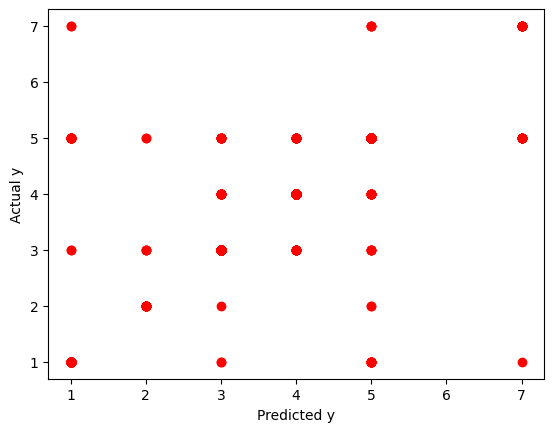

In [71]:
error_kreg = k_reg_predicted - y_test2
err = " %f %f %f" % (error_kreg.mean(), error_kreg.std(), error_kreg.max())
print(err)
y_actual = np.asarray(y_test2)
plt.plot(k_reg_predicted, y_actual,'ro')
#plt.plot([LL,UR],[LL,UR], 'g-')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
plt.show()

In [72]:
df1 = pd.DataFrame(np.asarray(log_reg_predicted))
df1.rename( columns={0 :'y_predicted_logistic-reg'}, inplace=True )

In [73]:
df1['y_predicted_kregressor'] = k_reg_predicted

In [74]:
display(df1)

,y_predicted_logistic-reg,y_predicted_kregressor
0,5,5
1,5,1
2,5,3
3,4,4
4,5,5
...,...,...
1130,5,5
1131,5,5
1132,5,5
1133,4,3


In [75]:
kregressor_v2 = KNeighborsClassifier(n_neighbors=4,weights='uniform')  # increasing the nearest neighbors
kregressor_v3 = KNeighborsClassifier(n_neighbors=6,weights='uniform')  # increasing the nearest neighbors
kregressor_v2.fit(X_train2, y_train2)
kregressor_v3.fit(X_train2, y_train2)
y_predictedv2 = kregressor_v2.predict(X_test)
y_predictedv3 = kregressor_v3.predict(X_test)

In [76]:
df1['y_predicted_kneighbors_4'] = y_predictedv2
df1['y_predicted_kneighbors_6'] = y_predictedv3
df1

,y_predicted_logistic-reg,y_predicted_kregressor,y_predicted_kneighbors_4,y_predicted_kneighbors_6
0,5,5,2,2
1,5,1,1,1
2,5,3,3,3
3,4,4,4,4
4,5,5,5,5
...,...,...,...,...
1130,5,5,5,5
1131,5,5,5,5
1132,5,5,1,1
1133,4,3,3,3


In [77]:
print('Accuracy of k Neighbors model with 6 neighbors is:', accuracy_score(y_test, y_predictedv3))

Accuracy of k Neighbors model with 6 neighbors is: 0.8237885462555066


RESULT:: Increasing the number of nearest neighbors and changing the weight from uniform to distance made changes to the results. kNN has maximum accuracy. I have noted that the accuracy is maximum when the number of nearest neighbors is 2 for the kNN model. With 2 nearest neighbors, accuracy was 0.85 and increasing the neighbors to 6 reducced the accuracy to 0.82.

Best Model :: Test the performance of the best model+hyperparameters combination using the
test set you created. Discuss your overall results

In [78]:
scoring = 'accuracy'
k4folds=5
results=[]
kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)
cv_results1 = model_selection.cross_val_score(KNeighborsClassifier(n_neighbors=2, weights='distance'), X_train, y_train, cv=kfold, scoring=scoring)
cv_results2 = model_selection.cross_val_score(LogisticRegression(solver='liblinear'), X_train, y_train, cv=kfold, scoring=scoring)
results.append(cv_results1)
results.append(cv_results2)

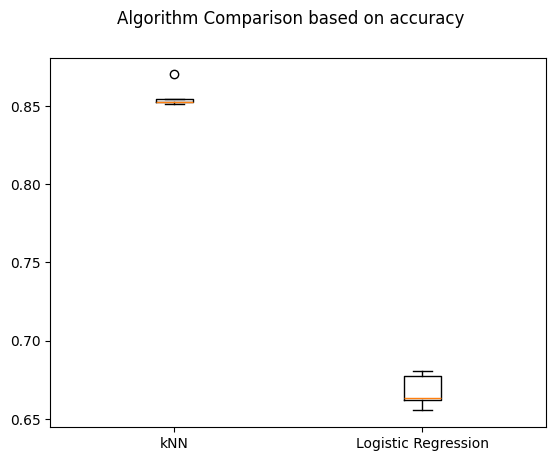

In [79]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison based on %s' % scoring)
ax = fig.add_subplot(111)
plt.boxplot(results)
names=['kNN','Logistic Regression']
ax.set_xticklabels(names)
plt.show()